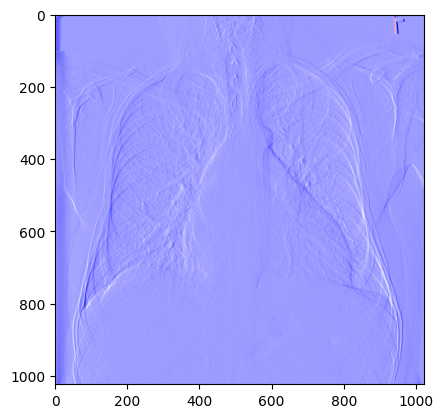

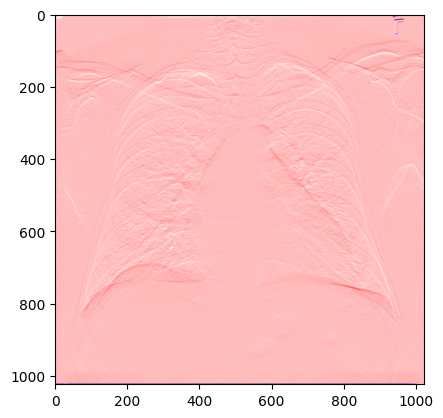

In [ ]:

from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

import oxr_utils as oxr
class GradientLoss(nn.Module):
    """
    Losstype = "mse" or "l1"
    """
    def __init__(self, device="cuda", loss_type="l1"):
        super(GradientLoss, self).__init__()
        self.device = device
        self.loss_type = ""
        
    def forward(self, outputs, targets):
        outputs = outputs.to(self.device)
        targets = targets.to(self.device)

        pred_grad_x, pred_grad_y = torch.gradient(outputs)
        target_grad_x, target_grad_y = torch.gradient(targets)

        if self.loss_type == 'l1':
            loss = F.l1_loss(pred_grad_x, target_grad_x) + F.l1_loss(pred_grad_y, target_grad_y)
        elif self.loss_type == 'mse':
            loss = F.mse_loss(pred_grad_x, target_grad_x) + F.mse_loss(pred_grad_y, target_grad_y)
        else:
            print("invalid losstype")
        return loss

grad_loss = GradientLoss()


# List of paths to your grayscale PNGs
image_paths = ["basic_camera_sim/00000001_000.png"]

# Transform: ensure grayscale and convert to tensor (0–1 range)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load and transform each image
tensors = []

path = image_paths[0]
img = Image.open(path).convert('L')  # Convert to 8-bit grayscale
tensor = transform(img)  # Tensor with shape [1, H, W], values in [0, 1]

xgrad, ygrad = oxr.sobel_gradient(tensor)

vmax= 0.1
vmin=-0.1

plt.imshow(xgrad.squeeze(),  cmap="seismic", vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(ygrad.squeeze(), cmap="seismic", vmin=vmin, vmax=vmax)
plt.show()


